# 第十次课-课后练习

本次作业是课后练习，供大家熟练课堂上讲授的基础知识点，不计入任何分数。

请将作业命名为 HW10-课后练习+姓名+学号.ipynb</span>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 一、分类问题概述

本部分已经提供了参考输出，你的代码运行结果需要与之相同

### 1.1 线性回归的例子 模型： y = ax + b

#### 1.1.1 生成数据与绘制散点图
使用rng生成自变量`x`与因变量`y`各50个样本点,满足`y=2x-1+噪声`,并且绘制出散点图

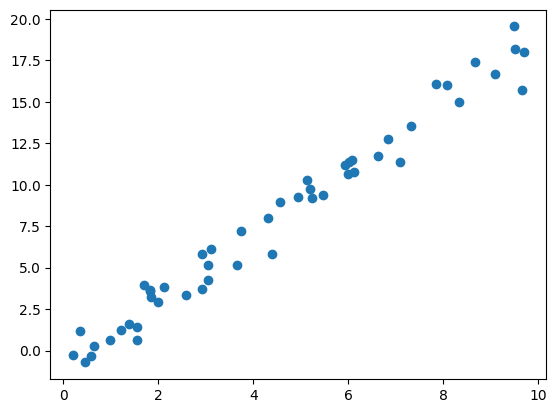

In [17]:
# TODO
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

#### 1.1.2 选择回归模型并进行拟合

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


In [19]:
# TODO: 对自变量x进行维度变换
X = x[:, np.newaxis] # 升一维
print(X.shape)

(50, 1)


In [20]:
# 拟合模型参数
model.fit(X,y)
# 观察模型参数-斜率，截距
model.coef_,model.intercept_

(array([1.9776566]), -0.9033107255311146)

#### 1.1.3 使用模型进行预测
生成一个从-1到11的十个样本点的等差数列作为预测数据`x_fit`,并使用模型预测出`yfit`

In [21]:
# TODO: 生成预测值
x_fit = np.linspace(-1, 11, 10)
y_fit = model.predict(x_fit[:, np.newaxis])
x_fit, y_fit

(array([-1.        ,  0.33333333,  1.66666667,  3.        ,  4.33333333,
         5.66666667,  7.        ,  8.33333333,  9.66666667, 11.        ]),
 array([-2.88096733, -0.24409186,  2.39278361,  5.02965908,  7.66653454,
        10.30341001, 12.94028548, 15.57716094, 18.21403641, 20.85091188]))

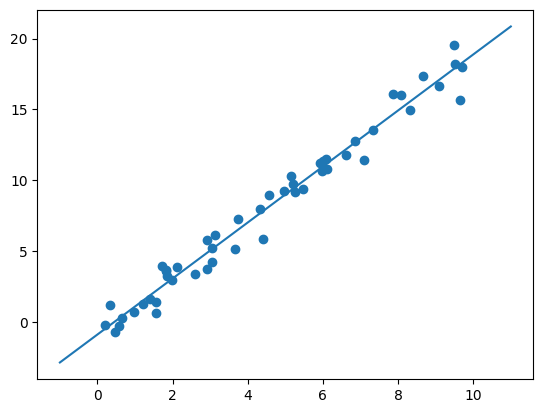

In [22]:
# TODO: 绘制拟合曲线和散点图
plt.scatter(x, y)
plt.plot(x_fit, y_fit)

## 二、条件概率与贝叶斯分类器

贝叶斯公式

### 2.1 离散特征的贝叶斯分类
使用贝叶斯分类器对文本进行分类

#### 2.1.1 下载数据，选择需要使用的数据集，分为训练集和测试集

In [23]:
from sklearn.datasets import fetch_20newsgroups
# 下载数据，打印"target_names"
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [24]:
# 为了简化期间，我们只选择四个类别
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



#### 2.1.2 建立模型，对数据进行预处理

为了将这些数据用于机器学习，我们需要能够将每个字符串的内容转换为数字向量。为此，我们将使用 TF-IDF），并创建一个将其附加到多项式朴素贝叶斯分类器的管道

In [25]:
# TODO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 创建一个pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#### 2.1.3 进行模型的训练，绘制混淆矩阵

In [26]:
# TODO: 训练模型,获取预测标签
# print(train)
model.fit(X=train.data, y=train.target)
labels = model.predict(test.data)

labels

array([2, 0, 1, ..., 1, 2, 1])

现在我们已经预测了测试数据的标签，可以评估它们以了解估计器的性能

Text(50.72222222222221, 0.5, 'predicted label')

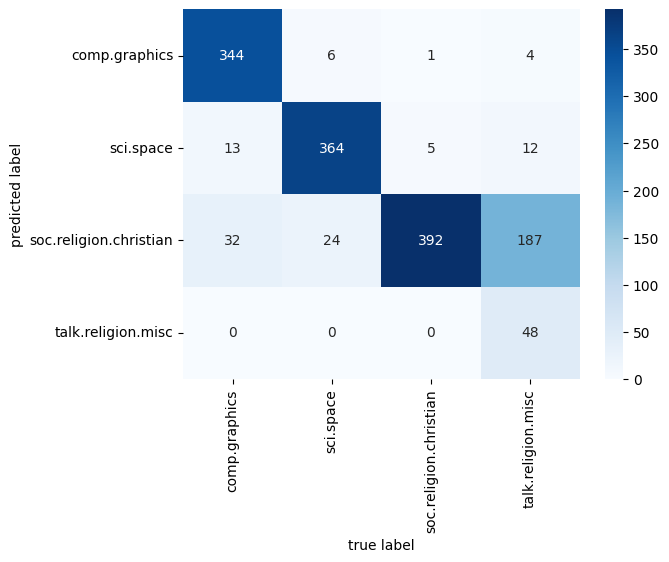

In [27]:
# TODO: 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
categories.sort()
y_true = [categories[i] for i in list(test.target)]
y_pred = [categories[i] for i in labels]
cm = confusion_matrix(y_pred, y_true)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 2.1.4 使用模型进行预测

In [28]:
# TODO: 预测函数，输入一个字符串，输出预测的类别
def predict_category(s, train=train, model=model):
    print(categories[model.predict([s])[0]])
    return categories[model.predict([s])[0]]

assert((predict_category('sending a payload to the ISS'))=='sci.space')
assert((predict_category('discussing the existence of God'))=='soc.religion.christian')
assert((predict_category('determining the screen resolution'))=='comp.graphics')

sci.space
soc.religion.christian
comp.graphics


### 2.2 连续特征的贝叶斯分类
对鸢尾花特征进行分类，比较手动实现GaussianNB和使用库函数的GaussianNB的结果

#### 2.2.1 观察一下数据集的特征

In [29]:
iris=sns.load_dataset('iris')
print(iris.head(n=3))
ir=iris.groupby('species')
ir.head(n=2)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


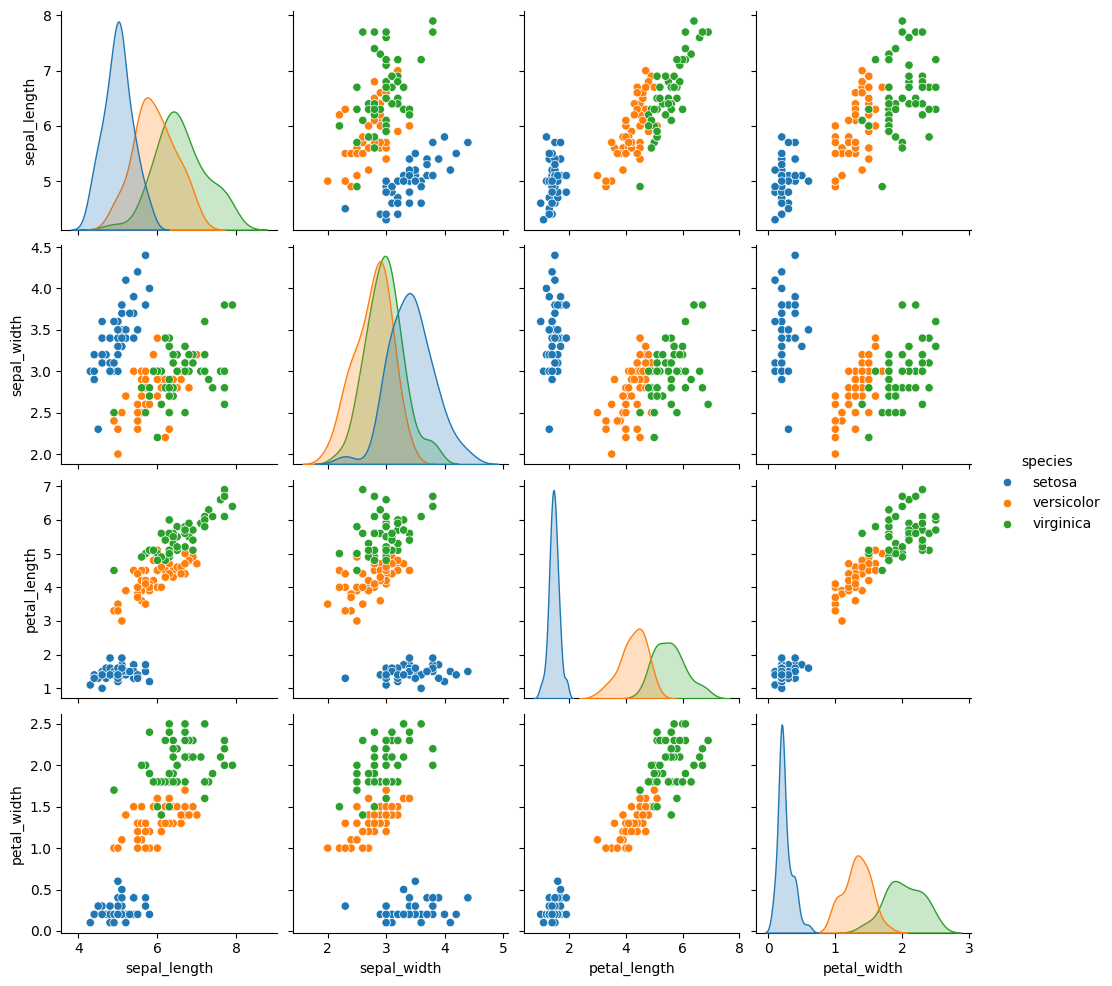

In [30]:
# 鸢尾花特征高维数据可视化（数据维度两两组合）
sns.pairplot(iris, hue='species', height=2.5)

#### 2.2.2 手动实现GaussianNB

In [31]:
class Gaussian(object):
    def __init__(self) -> None:
        # 这里可以设置平滑或先验参数
        pass
    def fit(self,X_train,Y_train):
        self._data_with_label=X_train.copy()
        self._Y_train=Y_train
        self._data_with_label['label']=Y_train[0]
        
        self._mean_mat=self._data_with_label.groupby('label').mean()
        self._var_mat=self._data_with_label.groupby('label').var()
        self.prior_rate=self._Priori()
    
    def _Priori(self):
        # TODO: 计算先验概率
        labels = self._Y_train[0].value_counts().sort_index() # label计数
        prior_rate = np.array([i / sum(labels) for i in labels]) # label比例
        return prior_rate
    
    def predict(self,X_test):
        # TODO: 计算预测结果
        pred = [self.__Condition_formula(self._mean_mat, self._var_mat, row) * self.prior_rate for row in X_test.values]
        class_result = np.argmax(pred, axis=1)
        return class_result
    
    def __Condition_formula(self,mu,sigma2,row):
        # TODO: 计算条件概率
        P_mat = 1 / np.sort(2 * math.pi * sigma2) * np.exp(-(row - mu) ** 2 / (2 * sigma2)) # 高斯函数计算
        P_mat = pd.DataFrame(P_mat).prod(axis=1) # 返回一列的乘积
        return P_mat

#### 2.2.3 导入数据，比较手动实现和库函数的结果

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris=load_iris()
iris.target = pd.DataFrame(iris.target)
iris.data = pd.DataFrame(iris.data)

# 不用科学计数法显示
np.set_printoptions(suppress=True)
# TODO: 划分训练集和测试集,test_size=0.4, random_state=1
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=1)

X_train

,0,1,2,3
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


对比直接调包的效果：
(1)记录训练和预测的时长
(2)记录准确率

In [33]:
from sklearn.metrics import accuracy_score
import time
# TODO: 使用自定义的高斯朴素贝叶斯算法
start_time = time.time()
NB = Gaussian()
NB.fit(X_train, Y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
print('Use custom Gaussian Naive Bayes algorithm')
print('accuracy on training set:  ', accuracy_score(y_train_pred, Y_train))
print('accuracy on training set:  ', accuracy_score(y_test_pred, Y_test))
print('---%s seconds ---' % (time.time() - start_time))


Use custom Gaussian Naive Bayes algorithm
accuracy on training set:   0.9555555555555556
accuracy on training set:   0.95
---0.06024813652038574 seconds ---


In [34]:
from sklearn.naive_bayes import GaussianNB
# TODO: 使用sklearn的高斯朴素贝叶斯算法
start_time = time.time()
NB2 = GaussianNB()
NB2.fit(X_train, Y_train.values.ravel()) # Y_train warning?
y_train_pred = NB2.predict(X_train)
y_test_pred = NB2.predict(X_test)
print('Use sklearn Gaussian Naive Bayes algorithm')
print('accuracy on training set:  ', accuracy_score(y_train_pred, Y_train))
print('accuracy on training set:  ', accuracy_score(y_test_pred, Y_test))
print('---%s seconds ---' % (time.time() - start_time))


Use sklearn Gaussian Naive Bayes algorithm
accuracy on training set:   0.9555555555555556
accuracy on training set:   0.95
---0.002900838851928711 seconds ---
